In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.32G/1.33G [00:28<00:00, 93.0MB/s]
100% 1.33G/1.33G [00:28<00:00, 50.6MB/s]


In [ ]:
!pip install tensorflow_docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-1s7ewbf9
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-1s7ewbf9
  Resolved https://github.com/tensorflow/docs to commit 6680535155460f7eb0d2d615b9749a0cf721d4ec
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.31743-py3-none-any.whl size=182531 sha256=11e35db18e6dc74a92b1874d124163e2889a934d89eb86ed566019b8af2a58dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7klbtnq/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs
  Attempting uninstall: tensorflow-docs
    Found existing installation: tensorflow-docs 2024.2.5.73858
    Uninstalling tensorflow-docs-2024.2.5.73858:
      Successfully uninstalled tensorflow-docs-2024.2.5.73858


In [ ]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [ ]:
!unzip celeba-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [ ]:
all_image_path = []
full_image_train_path = '/content/img_align_celeba/img_align_celeba'
for path in os.listdir(full_image_train_path):
  if '.jpg' in path:
    all_image_path.append(os.path.join(full_image_train_path, path))
image_path_50k = all_image_path[0:5000]
#image_test = all_image_path[5000:6000]
len(image_path_50k)

5000

In [ ]:
from PIL import Image
train_images = [np.array((Image.open(path)).resize((64,64))) for path in image_path_50k]
#test_images = [np.array((Image.open(path)).resize((64,64))) for path in image_test]

In [ ]:
for i in range(len(train_images)):
  train_images[i] = tf.cast(train_images[i], tf.float32)
  train_images[i] = (train_images[i] / 127.5) - 1.0

#for i in range(len(test_images)):
 # test_images[i] = tf.cast(test_images[i], tf.float32)
  #test_images[i] = (test_images[i] / 127.5) - 1.0

  #training_images[i] = ((training_images[i] - training_images[i].min())/(255 - training_images[i].min()))

train_images = np.array(train_images)
#test_images = np.array(test_images)

In [ ]:
train_images.shape

(5000, 64, 64, 3)

In [ ]:
batch_size=64
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(len(train_images)).batch(batch_size))
#test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
 #               .shuffle(len(test_images)).batch(batch_size))

In [ ]:
class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
                tf.keras.layers.Conv2D(
                    filters=32, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(
                    filters=128, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
    #            tf.keras.layers.Conv2D(
     #               filters=256, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
      #          tf.keras.layers.BatchNormalization(),
       #         tf.keras.layers.Conv2D(
        #            filters=512, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
         #       tf.keras.layers.BatchNormalization(),
          #      tf.keras.layers.Conv2D(
           #         filters=1024, kernel_size=3, strides=(2, 2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
            #    tf.keras.layers.BatchNormalization(),'''
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(units=4*4*256, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(4, 4, 256)),
                tf.keras.layers.Conv2DTranspose(
                    filters=128, kernel_size=3, strides=2, padding='same',
                    activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2DTranspose(
                    filters=64, kernel_size=3, strides=2, padding='same',
                    activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2DTranspose(
                    filters=32, kernel_size=3, strides=2, padding='same',
                    activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2DTranspose(
                    filters=3, kernel_size=3, strides=2, padding='same'),
                tf.keras.layers.BatchNormalization(),
                #tf.keras.layers.Activation('tanh'),
            ],
        )
        #assert model.output_shape == (None, 64, 64, 3)
    @tf.function
    def sample(self, eps):
        #if eps is None:
         #   eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_tanh=True)

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z, apply_tanh=False):
        logits = self.decoder(z)
        if apply_tanh:
            probs = tf.tanh(logits)
            return probs
        return logits
    def call(self, inputs, training=None):
        mean, logvar = self.encode(inputs)
        z = self.reparameterize(mean, logvar)
        reconstructed = self.decode(z)
        return reconstructed


In [ ]:
'''class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=16*16*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=3, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits'''

'class CVAE(tf.keras.Model):\n  """Convolutional variational autoencoder."""\n\n  def __init__(self, latent_dim):\n    super(CVAE, self).__init__()\n    self.latent_dim = latent_dim\n    self.encoder = tf.keras.Sequential(\n        [\n            tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),\n            tf.keras.layers.Conv2D(\n                filters=32, kernel_size=3, strides=(2, 2), activation=\'relu\'),\n            tf.keras.layers.Conv2D(\n                filters=64, kernel_size=3, strides=(2, 2), activation=\'relu\'),\n            tf.keras.layers.Flatten(),\n            # No activation\n            tf.keras.layers.Dense(latent_dim + latent_dim),\n        ]\n    )\n\n    self.decoder = tf.keras.Sequential(\n        [\n            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),\n            tf.keras.layers.Dense(units=16*16*32, activation=tf.nn.relu),\n            tf.keras.layers.Reshape(target_shape=(16, 16, 32)),\n            tf.keras.layers.Conv2DTranspose(\n     

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-4)
def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)

def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.sample(z)

    # Compute MSE for reconstruction loss
  mse_loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
  mse_loss = mse_loss_fn(x, x_logit)
  mse_loss = tf.reduce_sum(mse_loss, axis=[0, 1, 2])  # Summing over all spatial dimensions

    # Define distributions
  qz = tfp.distributions.Normal(mean, tf.exp(0.5 * logvar))
  pz = tfp.distributions.Normal(0., 1.)

    # Compute KL divergence
  kl_divergence = tfp.distributions.kl_divergence(qz, pz)
  kl_divergence = tf.reduce_sum(kl_divergence, axis=0)
  #stddevs = tf.exp(0.5*logvar)
  #kl_divergence = -0.5*tf.reduce_sum(1 + tf.math.log(stddevs) - tf.math.square(mean) - tf.math.square(stddevs))

    # Total loss
  total_loss = tf.reduce_mean(mse_loss + kl_divergence)

  return total_loss, mse_loss, kl_divergence

  '''mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  #cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = tf.reduce_mean(tf.square(x - x_logit), axis=[1, 2, 3])
  #logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x), logpx_z, logqz_x-logpz'''


@tf.function
def train_step(model, x, optimizer):
  with tf.GradientTape() as tape:
    elbo_loss, recon_loss, kl_loss = compute_loss(model, x)
  gradients = tape.gradient(elbo_loss, model.trainable_variables)
  gradients = [tf.clip_by_value(grad, -1.0, 1.0) for grad in gradients]
  #optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return elbo_loss, recon_loss, kl_loss

In [ ]:
epochs = 250
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 32
num_examples_to_generate = 8

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)
x_ = np.ones((1, 64, 64, 3))
x_recon = model(x_)
x_recon.shape
# Before the training loop, build the optimizer with the model's variables
#optimizer.build(model.trainable_variables)

# ... rest of your code

TensorShape([1, 64, 64, 3])

In [ ]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.decode(z)
    #predictions = (predictions + 1.0) * 127.5
    #predictions = tf.clip_by_value(predictions, 0, 255)  # Ensure values are in [0, 255]
    #predictions = tf.cast(predictions, tf.uint8)  # Convert to uint8

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow((test_sample[i]+1)/2)
        plt.axis('off')
    plt.show()
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow((predictions[i] + 1) / 2)
        plt.axis('off')

    #for i in range(predictions.shape[0])

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()


In [ ]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for train_batch in train_dataset.take(1):
  train_sample = train_batch[0:num_examples_to_generate, :, :, :]

Epoch: 250, ELBO: -1559.81689453125, time elapse for current epoch: 25.66752791404724


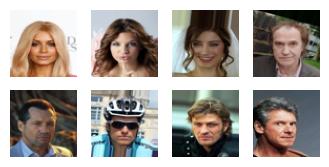

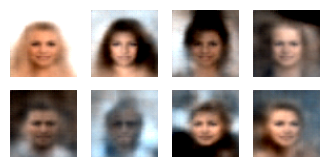

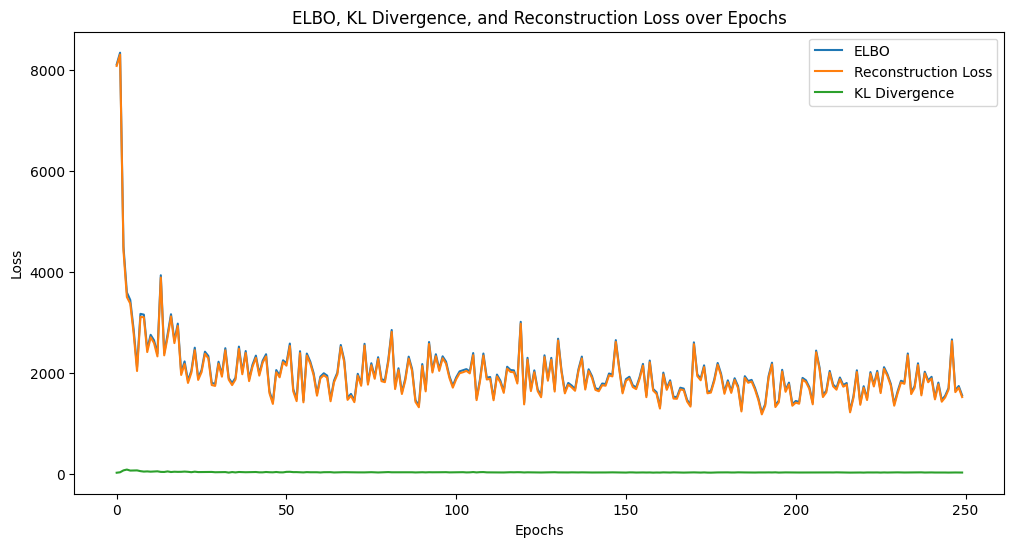

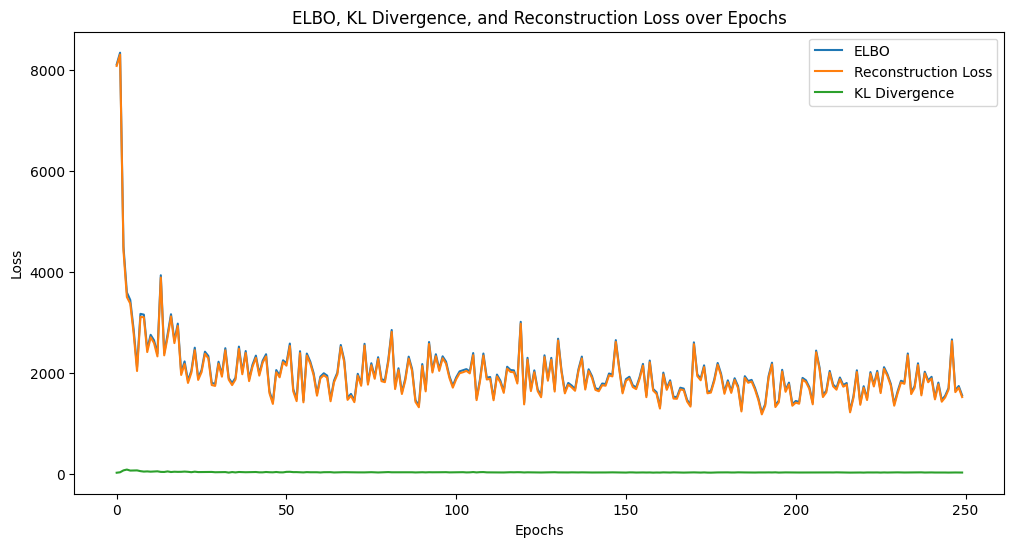

In [ ]:
generate_and_save_images(model, 0, train_sample)
elbo_losses = []
recon_losses = []
kl_losses = []


for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    elbo_loss, recon_loss, kl_loss = train_step(model, train_x, optimizer)
  elbo_losses.append(tf.reduce_mean(elbo_loss))
  recon_losses.append(tf.reduce_mean(recon_loss))
  kl_losses.append(tf.reduce_mean(kl_loss))
  end_time = time.time()

  '''loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    elbo_loss, recon_loss, kl_loss = compute_loss(model, x)
    loss(elbo_loss)
  elbo = -loss.result()
  display.clear_output(wait=False)'''
  display.clear_output(wait=False)
  print('Epoch: {}, ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, -elbo_loss, end_time - start_time))
  #print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
  #      .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, train_sample)
  plt.figure(figsize=(12, 6))
  plt.plot(elbo_losses, label='ELBO')
  plt.plot(recon_losses, label='Reconstruction Loss')
  plt.plot(kl_losses, label='KL Divergence')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('ELBO, KL Divergence, and Reconstruction Loss over Epochs')
  plt.show()
plt.figure(figsize=(12, 6))
plt.plot(elbo_losses, label='ELBO')
plt.plot(recon_losses, label='Reconstruction Loss')
plt.plot(kl_losses, label='KL Divergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ELBO, KL Divergence, and Reconstruction Loss over Epochs')
plt.show()

In [ ]:
6